In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [111]:
house = pd.read_csv("train.csv")

In [112]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [113]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [114]:
house.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [115]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step-2 Data Cleaning
#### Handling Missing Values In Dataset

In [116]:
# Checking Percentage of missing values for each columns
percent_missing = house.isnull().sum() * 100 / len(house)
missing_value_house = pd.DataFrame({'column_name': house.columns,
                                 'percent_missing': percent_missing})
missing_value_house.sort_values('percent_missing', inplace=True, ascending=False)
print(round(missing_value_house,2))

             column_name  percent_missing
PoolQC            PoolQC            99.52
MiscFeature  MiscFeature            96.30
Alley              Alley            93.77
Fence              Fence            80.75
FireplaceQu  FireplaceQu            47.26
...                  ...              ...
ExterQual      ExterQual             0.00
Exterior2nd  Exterior2nd             0.00
Exterior1st  Exterior1st             0.00
RoofMatl        RoofMatl             0.00
SalePrice      SalePrice             0.00

[81 rows x 2 columns]


In [117]:
# Dropping the columns that are having missing values more than 80%
house = house.drop(['PoolQC', 'MiscFeature', 'Alley',  'Fence'], axis = 1)

In [118]:
# checking for the null values in numerical variables
house.select_dtypes(include=['int64','float']).isnull().sum()[house.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [119]:
# replacing the null values with the mean
house['LotFrontage'] = house['LotFrontage'].replace(np.nan, house['LotFrontage'].mean())
house['MasVnrArea'] = house['MasVnrArea'].replace(np.nan, house['MasVnrArea'].mean())

In [120]:
# checking for the null values in categorical variables
house.select_dtypes(include='object').isnull().sum()[house.select_dtypes(include='object').isnull().sum()>0]

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [121]:
# Replacing the null values with mode including Numerical Vaaariable 'GarageYrBlt'
house = house.fillna(house.mode().iloc[0])

In [122]:
# Again Checking null values in the categorical variable column
house.select_dtypes(include='object').isnull().sum()[house.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [123]:
# Again Checking null values in the numerical variable column
house.select_dtypes(include=['int64','float']).isnull().sum()[house.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

Series([], dtype: int64)

In [124]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### checking outliers

In [125]:
#Checking for outlier in the numerical columns
house.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [126]:
# Removing outliers
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [127]:
#Checking the shape of the dataframe
house.shape

(1460, 77)

In [128]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Step-3: Visualization of Data

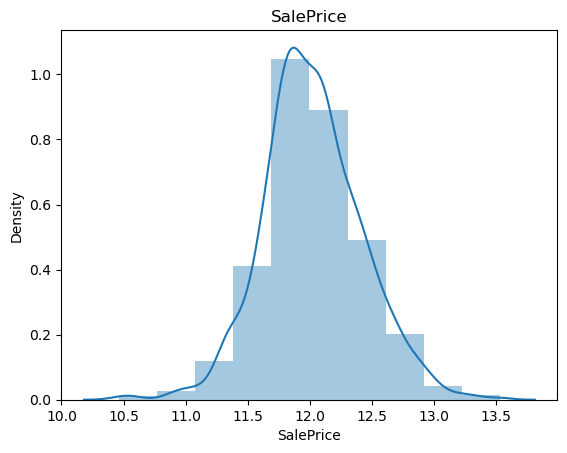

In [129]:
# Visualise the target variable -> SalePrice after transforming the sales price

house['SalePrice'] = np.log1p(house['SalePrice'])

plt.title('SalePrice')
sns.distplot(house['SalePrice'], bins=10)
plt.show()

<Figure size 1000x500 with 0 Axes>

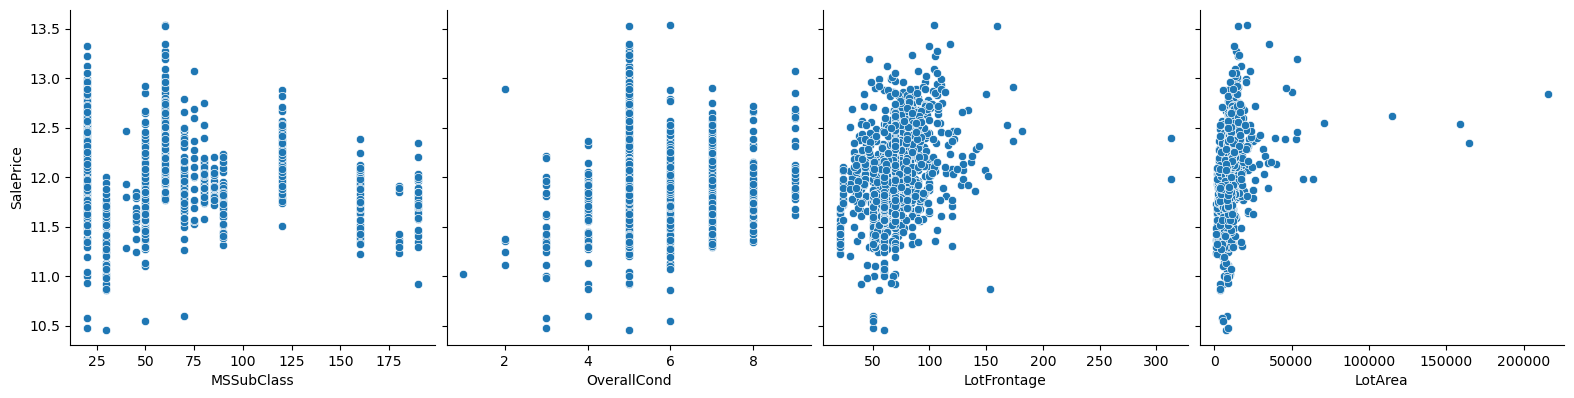

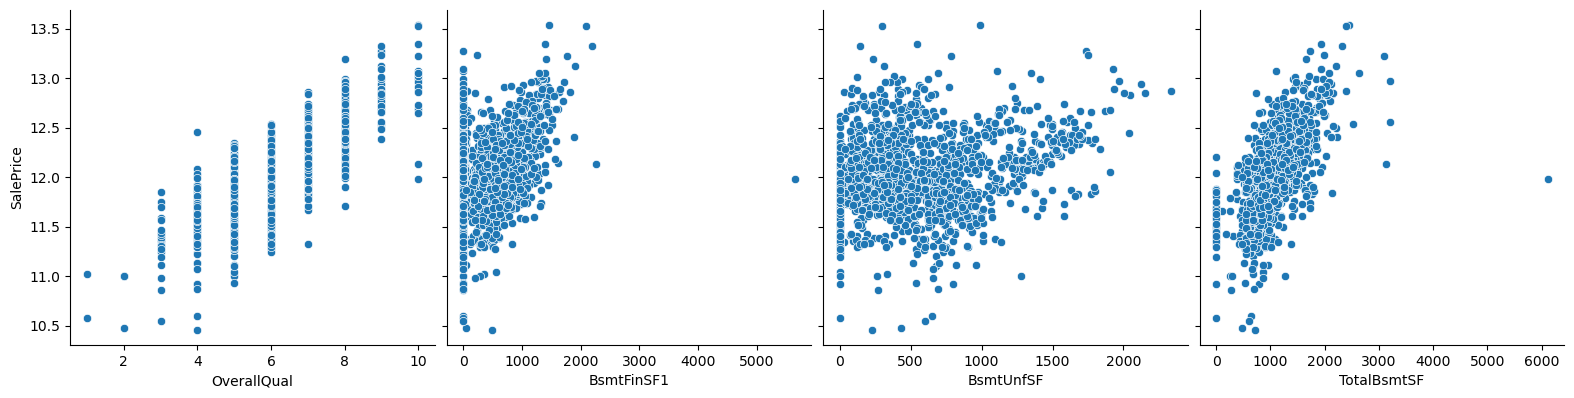

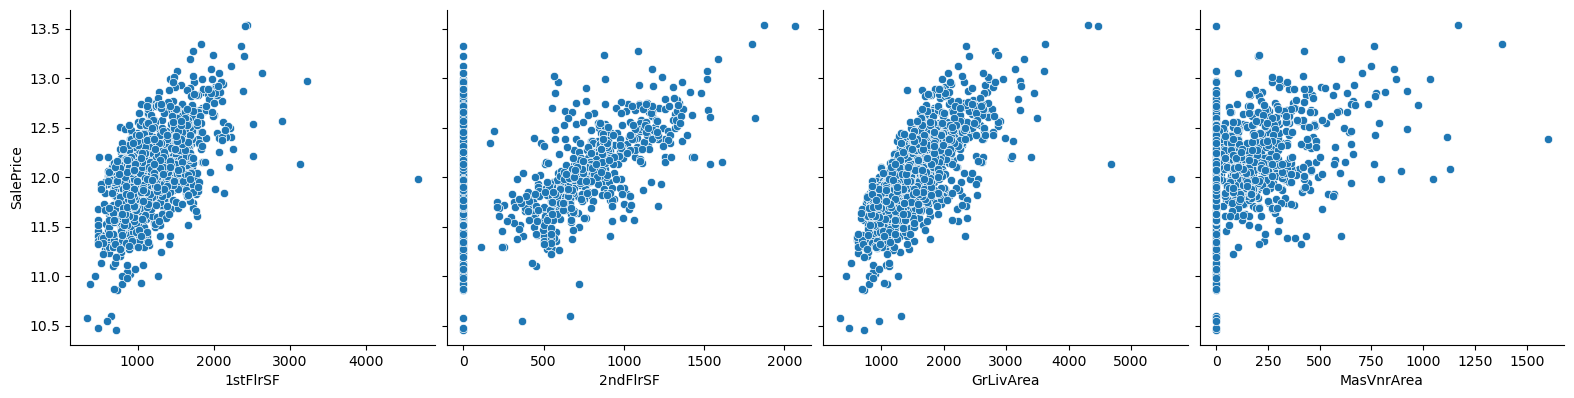

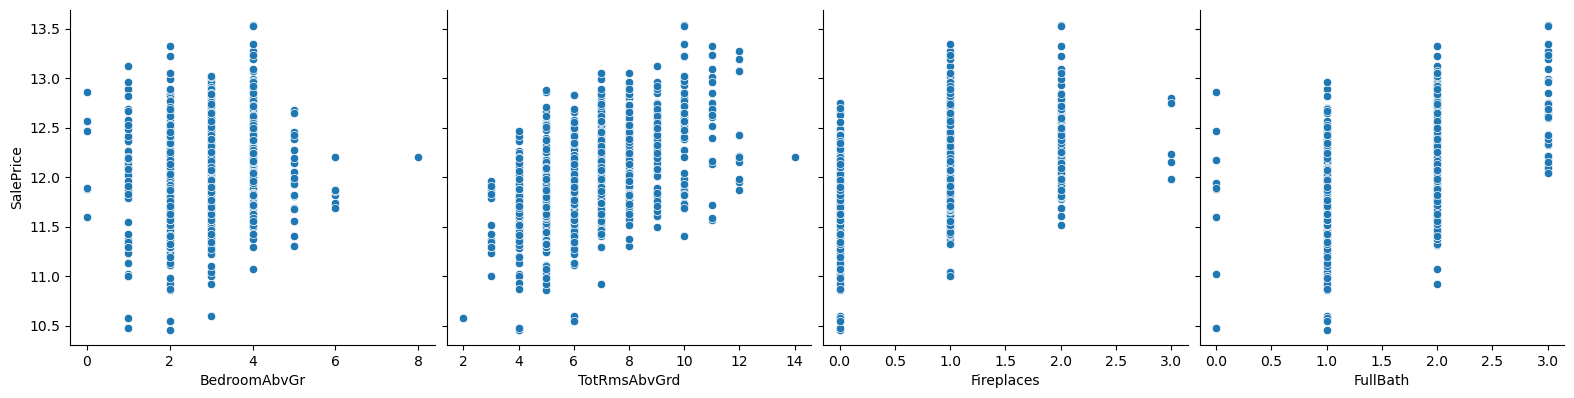

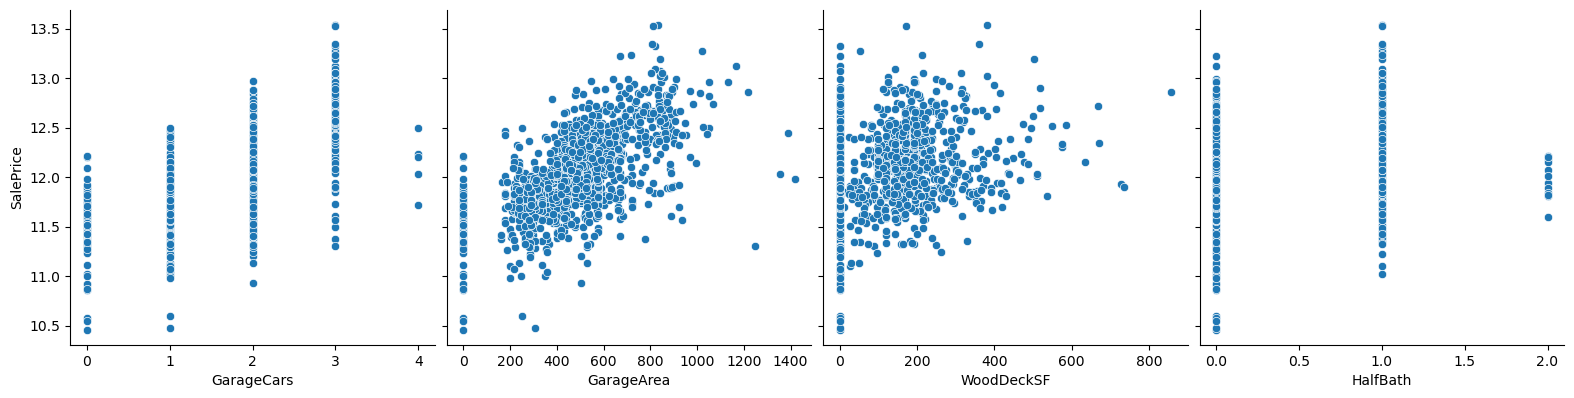

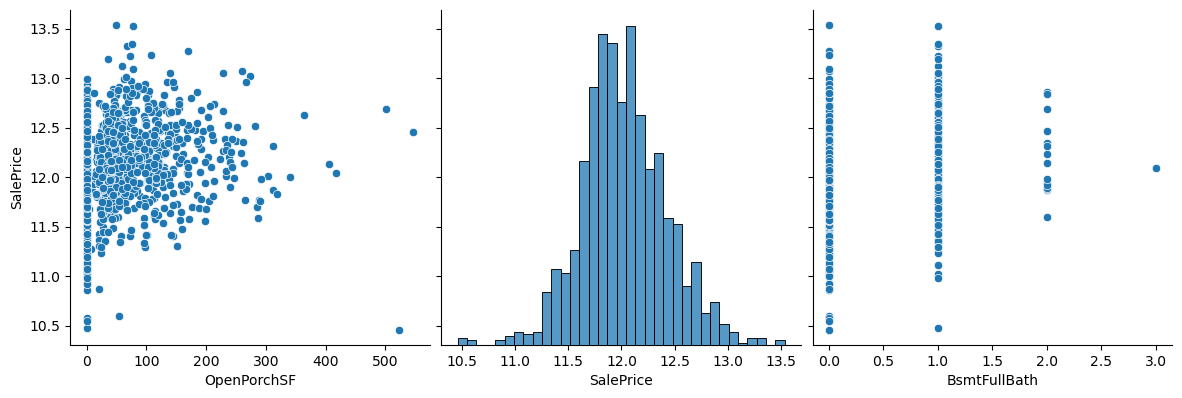

In [130]:
# Creating pairplot for continuous variables
plt.figure(figsize=(10,5))
sns.pairplot(house, x_vars=['MSSubClass', 'OverallCond','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['OverallQual','BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces', 'FullBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['GarageCars','GarageArea', 'WoodDeckSF', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['OpenPorchSF','SalePrice', 'BsmtFullBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')

plt.show()

In [131]:
# Check the correlation of numerical columns
# correlation matrix
data_numeric = house.select_dtypes(include=['float64', 'int64'])
cor = data_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.017942
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.336156
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.429532
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023


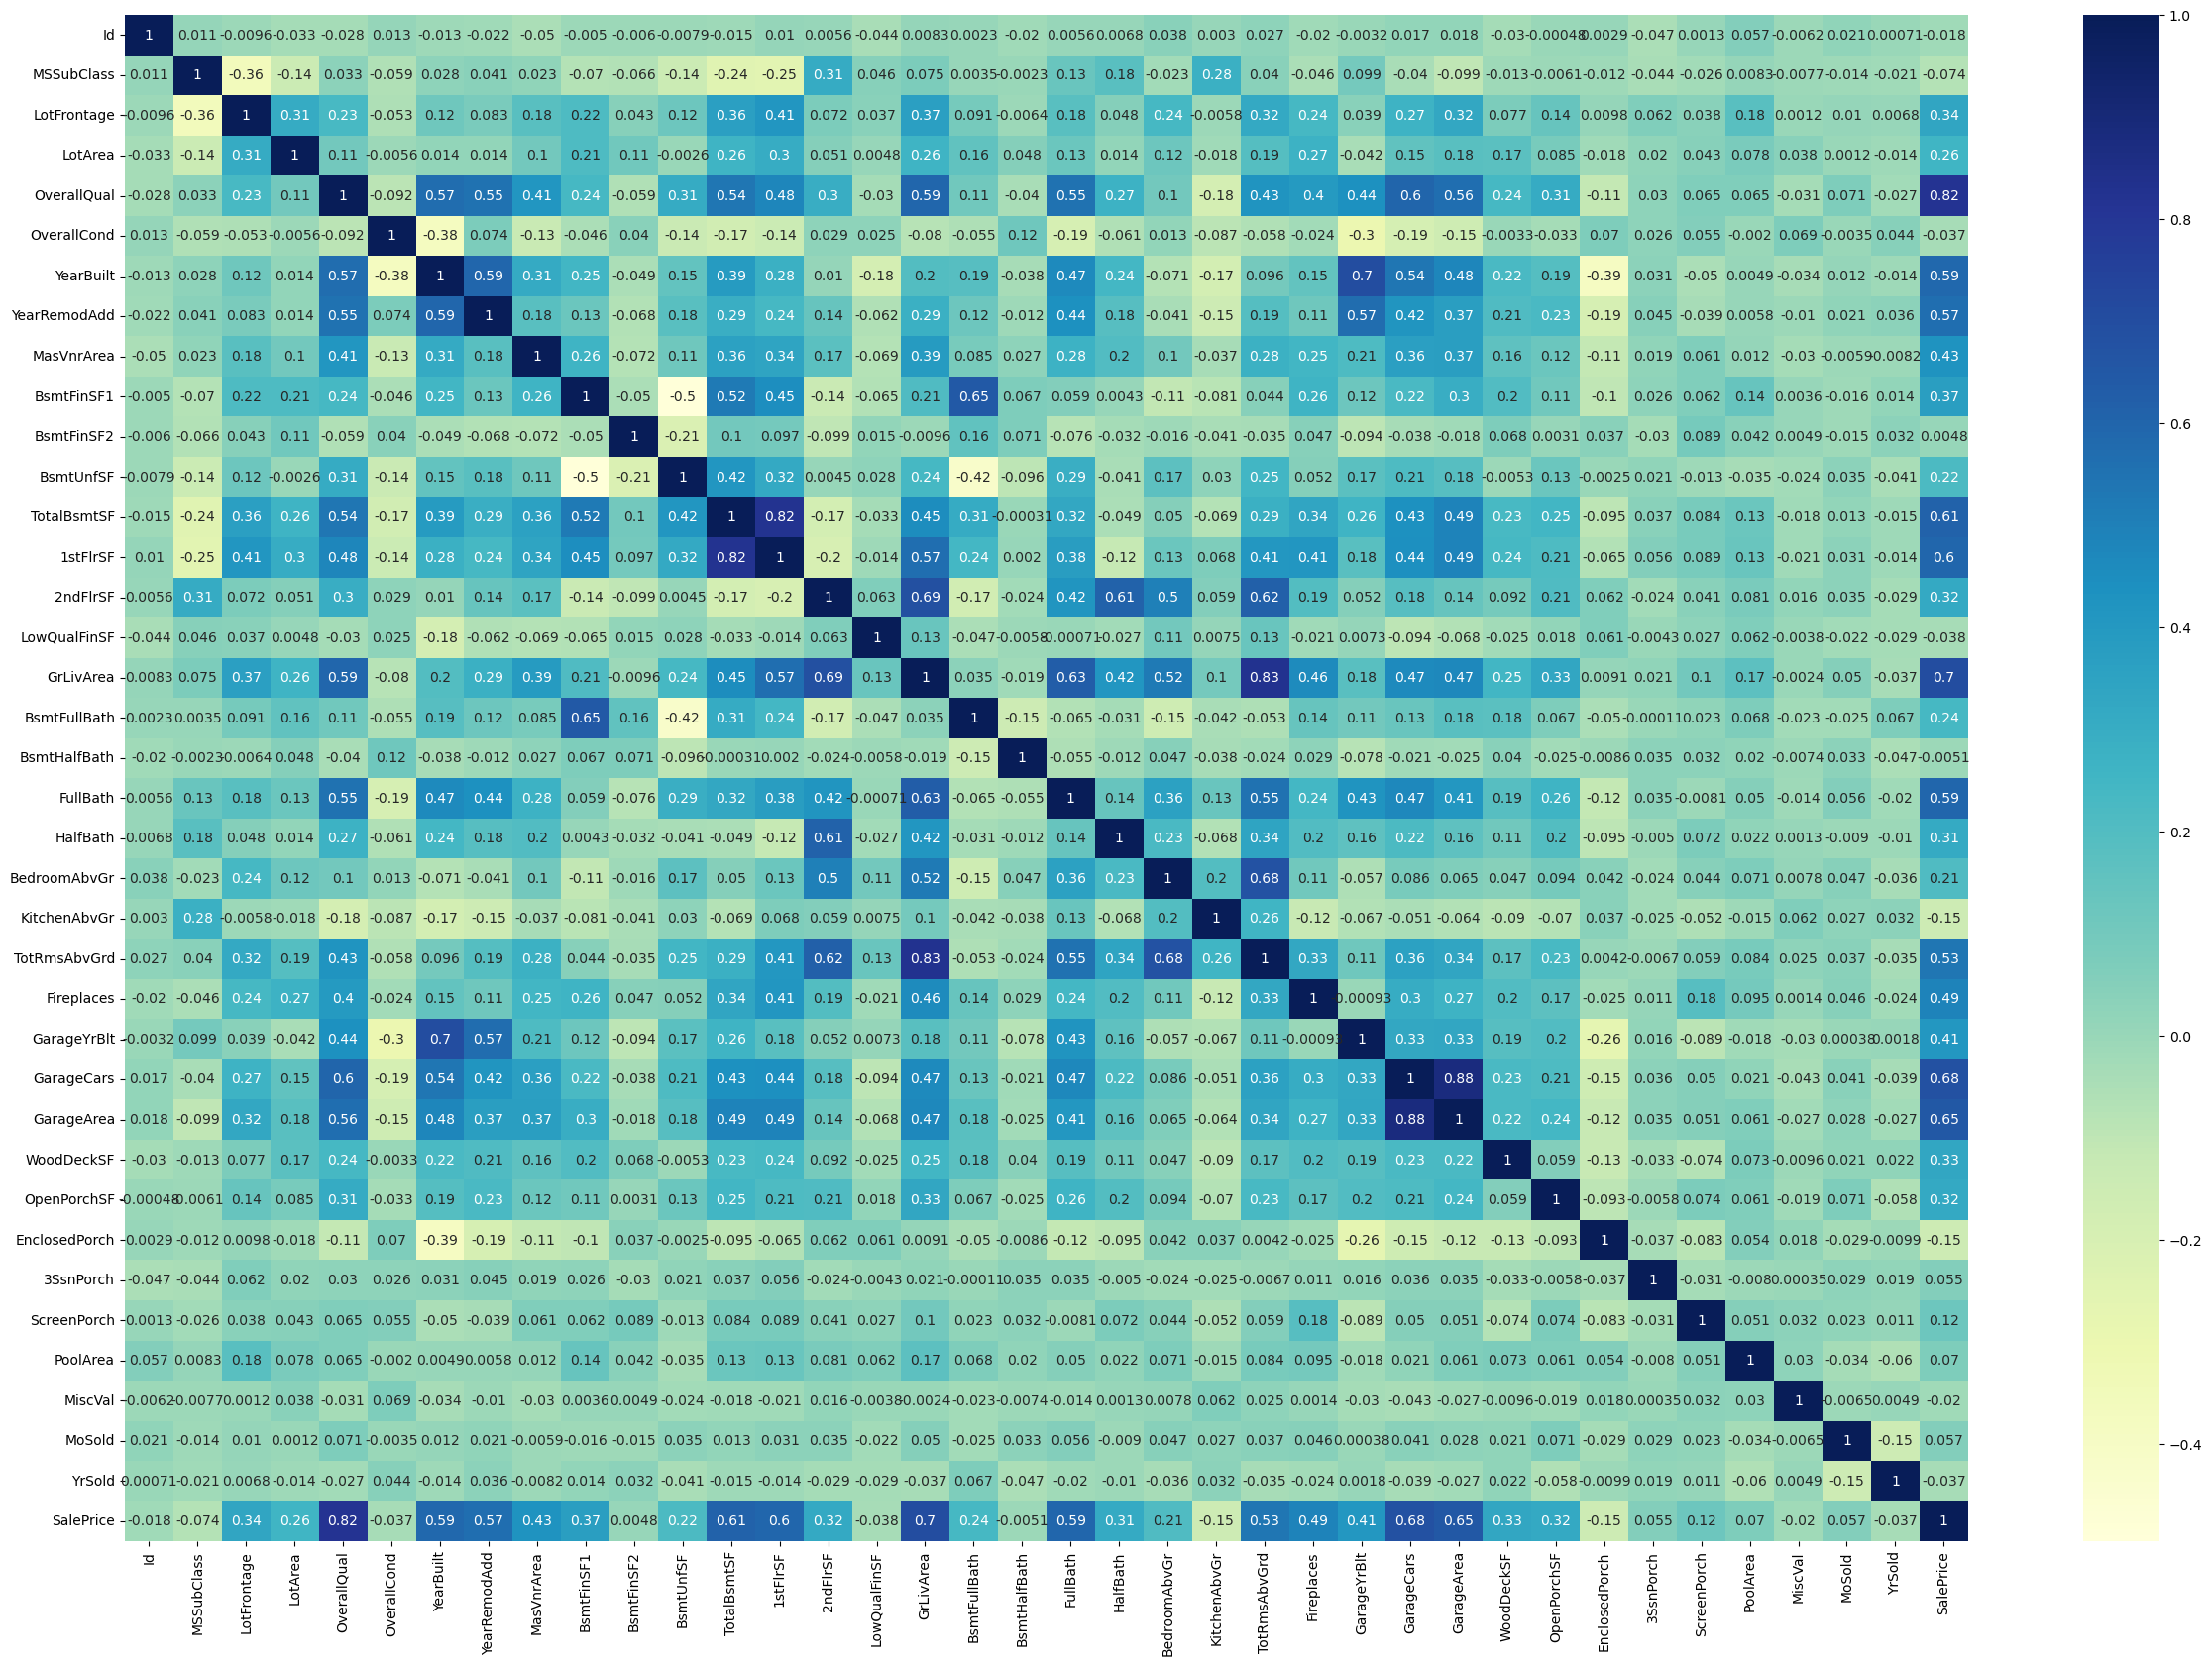

In [132]:
# plotting correlations on a heatmap
plt.figure(figsize=(30,20))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### Dropping the variables that are highly correlated

- GarageCars and GarageArea are having correlation of 88%.
- TotRmsAbvGrd and GrLivArea are having correlation of 83%.
- TotalBsmtSF and 1stFlrSF are having the correlation of 82%.

- Dropping 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageArea' columns.

In [133]:
house.drop(['TotRmsAbvGrd', 'GarageArea', 'TotalBsmtSF'], axis = 1, inplace = True)

In [134]:
house.shape

(1460, 74)

In [135]:
# we can derive age of property 'PropAge' from yearsold - yearbuilt
# after that dropping the columns 'yrSold', 'YearBuilt', 'MoSold', 'YearRemodAdd'
house['PropAge'] = (house['YrSold'] - house['YearBuilt'])
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,12.429220,8


In [136]:
house.drop(['YrSold', 'YearBuilt', 'MoSold', 'YearRemodAdd'], axis = 1)
house.shape

(1460, 75)

### Remove numerical attributes that have more than 85% data associated to one value.
- We will remove any column that has one value repeating 1241 times (1241/1460)*100 = 85%) as this column would be skewed
  to one value

In [137]:
# Drop the following columns that have more than 85% values associated to a specific value

def getHighNumericalValueCounts():
    column = []
    numerical_columns = house.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(house[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsRemoved = getHighNumericalValueCounts()
house.drop(columnsRemoved, axis = 1, inplace = True)
house.shape

(1460, 66)

In [138]:
# dropping 'Id' as it is of no use because it is just an index
house.drop(['Id'], axis = 1, inplace = True)
house.shape

(1460, 65)

In [139]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,2,2008,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,5,2007,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,9,2008,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,2,2006,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,12,2008,WD,Normal,12.429220,8


In [140]:
# we should convert numeric_type to a list to make it easier to work with
types = house.dtypes
numeric_type = types[(types == 'int64') | (types == float)] 
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice', 'PropAge']


In [141]:
# Categorical Variables
types = house.dtypes
categorical_type = types[types == object]
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


### Step-4: Preparation of Data

- Converting categorical data into numercal data
- Creating Dummies

In [142]:
# List of variables to map

def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})
varlist = ['Street']
house[varlist] = house[varlist].apply(binary_map)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,1,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,2,2008,WD,Normal,12.247699,5
1,20,RL,80.0,9600,1,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,5,2007,WD,Normal,12.109016,31
2,60,RL,68.0,11250,1,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,9,2008,WD,Normal,12.317171,7
3,70,RL,60.0,9550,1,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,2,2006,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,1,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,12,2008,WD,Normal,12.429220,8


In [143]:
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})
varlist1 = ['Utilities']
house[varlist1] = house[varlist1].apply(binary_map)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,1,Reg,Lvl,1,Inside,Gtl,...,TA,Y,0,61,2,2008,WD,Normal,12.247699,5
1,20,RL,80.0,9600,1,Reg,Lvl,1,FR2,Gtl,...,TA,Y,298,0,5,2007,WD,Normal,12.109016,31
2,60,RL,68.0,11250,1,IR1,Lvl,1,Inside,Gtl,...,TA,Y,0,42,9,2008,WD,Normal,12.317171,7
3,70,RL,60.0,9550,1,IR1,Lvl,1,Corner,Gtl,...,TA,Y,0,35,2,2006,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,1,IR1,Lvl,1,FR2,Gtl,...,TA,Y,192,84,12,2008,WD,Normal,12.429220,8


In [144]:
def binary_map(x):
    return x.map({'Y': 1, "N": 0})
varlist2 = ['CentralAir']
house[varlist2] = house[varlist2].apply(binary_map)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,1,Reg,Lvl,1,Inside,Gtl,...,TA,Y,0,61,2,2008,WD,Normal,12.247699,5
1,20,RL,80.0,9600,1,Reg,Lvl,1,FR2,Gtl,...,TA,Y,298,0,5,2007,WD,Normal,12.109016,31
2,60,RL,68.0,11250,1,IR1,Lvl,1,Inside,Gtl,...,TA,Y,0,42,9,2008,WD,Normal,12.317171,7
3,70,RL,60.0,9550,1,IR1,Lvl,1,Corner,Gtl,...,TA,Y,0,35,2,2006,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,1,IR1,Lvl,1,FR2,Gtl,...,TA,Y,192,84,12,2008,WD,Normal,12.429220,8


## Creating Dummy Variables

In [145]:
house['d_MSSubClass'] = house['MSSubClass'].map({20 : "1-STORY_1946", 30 : "1-STORY 1945", 40 : "1-STORY W/FINISHED", 45 : "1-1/2_STORY_UNFINISHED", 60 : "2-STORY_1946", 70 : "2-STORY 1945 & OLDER", 75 : "2-1/2 STORY", 80 : "SPLIT OR MULTI-LEVEL", 85 : "SPLIT FOYER", 90 : "DUPLEX - ALL STYLES AND AGES", 120 : "1-STORY PUD_1946 & NEWER", 150 : "1-1/2 STORY PUD - ALL AGES", 160 : "2-STORY PUD - 1946 & NEWER", 180 : "PUD - MULTILEVEL", 190: "2 FAMILY CONVERSION"})
d_MSSubClass_new = pd.get_dummies(house['d_MSSubClass'], drop_first = True)

house = pd.concat([house, d_MSSubClass_new], axis = 1)
house = house.drop(['MSSubClass'], axis = 1)
house.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,1-STORY_1946,2 FAMILY CONVERSION,2-1/2 STORY,2-STORY 1945 & OLDER,2-STORY PUD - 1946 & NEWER,2-STORY_1946,DUPLEX - ALL STYLES AND AGES,PUD - MULTILEVEL,SPLIT FOYER,SPLIT OR MULTI-LEVEL
0,RL,65.0,8450,1,Reg,Lvl,1,Inside,Gtl,CollgCr,...,0,0,0,0,0,1,0,0,0,0
1,RL,80.0,9600,1,Reg,Lvl,1,FR2,Gtl,Veenker,...,1,0,0,0,0,0,0,0,0,0
2,RL,68.0,11250,1,IR1,Lvl,1,Inside,Gtl,CollgCr,...,0,0,0,0,0,1,0,0,0,0
3,RL,60.0,9550,1,IR1,Lvl,1,Corner,Gtl,Crawfor,...,0,0,0,1,0,0,0,0,0,0
4,RL,84.0,14260,1,IR1,Lvl,1,FR2,Gtl,NoRidge,...,0,0,0,0,0,1,0,0,0,0


In [146]:
MSZoning_new = pd.get_dummies(house['MSZoning'], drop_first = True)

house = pd.concat([house, MSZoning_new], axis = 1)
house = house.drop(['MSZoning'], axis = 1)
house.head()

,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,2-STORY PUD - 1946 & NEWER,2-STORY_1946,DUPLEX - ALL STYLES AND AGES,PUD - MULTILEVEL,SPLIT FOYER,SPLIT OR MULTI-LEVEL,FV,RH,RL,RM
0,65.0,8450,1,Reg,Lvl,1,Inside,Gtl,CollgCr,Norm,...,0,1,0,0,0,0,0,0,1,0
1,80.0,9600,1,Reg,Lvl,1,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,1,IR1,Lvl,1,Inside,Gtl,CollgCr,Norm,...,0,1,0,0,0,0,0,0,1,0
3,60.0,9550,1,IR1,Lvl,1,Corner,Gtl,Crawfor,Norm,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,1,IR1,Lvl,1,FR2,Gtl,NoRidge,Norm,...,0,1,0,0,0,0,0,0,1,0


In [147]:
LotShape_new = pd.get_dummies(house['LotShape'], drop_first = True)

house = pd.concat([house, LotShape_new], axis = 1)
house = house.drop(['LotShape'], axis = 1)
house.head()

,LotFrontage,LotArea,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,PUD - MULTILEVEL,SPLIT FOYER,SPLIT OR MULTI-LEVEL,FV,RH,RL,RM,IR2,IR3,Reg
0,65.0,8450,1,Lvl,1,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,0,0,1,0,0,0,1
1,80.0,9600,1,Lvl,1,FR2,Gtl,Veenker,Feedr,Norm,...,0,0,0,0,0,1,0,0,0,1
2,68.0,11250,1,Lvl,1,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,1,Lvl,1,Corner,Gtl,Crawfor,Norm,Norm,...,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,1,Lvl,1,FR2,Gtl,NoRidge,Norm,Norm,...,0,0,0,0,0,1,0,0,0,0


In [148]:
house_categorical = house.select_dtypes(include=['object'])
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,...,d_MSSubClass_1-STORY_1946,d_MSSubClass_2 FAMILY CONVERSION,d_MSSubClass_2-1/2 STORY,d_MSSubClass_2-STORY 1945 & OLDER,d_MSSubClass_2-STORY PUD - 1946 & NEWER,d_MSSubClass_2-STORY_1946,d_MSSubClass_DUPLEX - ALL STYLES AND AGES,d_MSSubClass_PUD - MULTILEVEL,d_MSSubClass_SPLIT FOYER,d_MSSubClass_SPLIT OR MULTI-LEVEL
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [149]:
house = house.drop(list(house_categorical.columns), axis=1)

In [150]:
house = pd.concat([house, house_dummies], axis=1)

In [151]:
house.shape

(1460, 251)

In [152]:
house.describe()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,d_MSSubClass_1-STORY_1946,d_MSSubClass_2 FAMILY CONVERSION,d_MSSubClass_2-1/2 STORY,d_MSSubClass_2-STORY 1945 & OLDER,d_MSSubClass_2-STORY PUD - 1946 & NEWER,d_MSSubClass_2-STORY_1946,d_MSSubClass_DUPLEX - ALL STYLES AND AGES,d_MSSubClass_PUD - MULTILEVEL,d_MSSubClass_SPLIT FOYER,d_MSSubClass_SPLIT OR MULTI-LEVEL
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,0.995890,0.999315,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,0.367123,0.020548,0.010959,0.041096,0.043151,0.204795,0.035616,0.006849,0.013699,0.039726
std,22.024023,9981.264932,0.063996,0.026171,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,0.482186,0.141914,0.104145,0.198580,0.203266,0.403690,0.185395,0.082505,0.116277,0.195382
min,21.000000,1300.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,1.000000,1.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.049958,9478.500000,1.000000,1.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,79.000000,11601.500000,1.000000,1.000000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1.000000,1.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [153]:
y = house.pop('SalePrice')
X = house

## Step-5: Feature Scaling

In [154]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'Street', 'Utilities', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'd_MSSubClass_1-STORY_1946', 'd_MSSubClass_2 FAMILY CONVERSION',
       'd_MSSubClass_2-1/2 STORY', 'd_MSSubClass_2-STORY 1945 & OLDER',
       'd_MSSubClass_2-STORY PUD - 1946 & NEWER', 'd_MSSubClass_2-STORY_1946',
       'd_MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'd_MSSubClass_PUD - MULTILEVEL', 'd_MSSubClass_SPLIT FOYER',
       'd_MSSubClass_SPLIT OR MULTI-LEVEL'],
      dtype='object', length=250)

## Step-6 Split into Train and Test Data

In [155]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Step-7: Model Building and Evaluation

### Linear Regression

In [156]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [157]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [158]:
from sklearn.metrics import r2_score, mean_squared_error

In [159]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9581794405309538
-1.7961478934794627e+21
6.711789262704725
1.2944408206958012e+23
0.006573740707840083
2.9553443394881303e+20


## As we can see, r2 score for training data is 0.95 and for test data is -1.79.. This is overfitting.. To overcome, we will try Lasso and Ridge Regression.

### Ridge Regression

In [160]:
from sklearn.model_selection import GridSearchCV

In [161]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [162]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [163]:
#Fitting Ridge model for alpha = 5.0 and printing coefficients which have been penalised
alpha = 5.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.11391099e-03  2.94434652e-02  4.91699158e-03  2.41008155e-03
  5.66504539e-02  3.52256596e-02  2.57157015e-02  2.49662452e-02
  3.79567168e-03  3.64649316e-02  2.18884889e-02  1.57387719e-02
  5.03705280e-02  3.81742290e-02  7.71995318e-02  1.62962966e-02
  1.10937213e-02  9.50931106e-03  8.17085062e-03  1.47204090e-02
 -2.26669630e-03  3.46629230e-02  8.87812231e-03  4.47697236e-03
  1.17716565e-03 -3.15903768e-03 -2.58142291e-02 -6.64119487e-03
 -1.02825255e-03 -2.96505730e-03  2.87586658e-03 -3.94417023e-03
  1.63546993e-03  4.10235051e-03 -1.28605323e-02 -5.68316645e-03
 -4.85002878e-03 -3.41381105e-03  2.60866576e-04 -2.47044872e-03
  7.01064282e-02  3.28994070e-02  1.33033608e-01  9.69850026e-02
  1.80147777e-03 -3.80793143e-03  2.90518061e-03  2.96000067e-03
  7.60166936e-04  9.76131212e-03  7.98864262e-03 -7.06097194e-03
 -1.67139596e-03 -4.24834992e-03  4.22153326e-03 -1.59219192e-02
  3.72352797e-03  1.97671301e-03  1.64235269e-02  1.16453722e-02
  4.86400162e-03  2.65466

In [164]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9557983764999891
0.8665118763985584
7.093926665927887
9.620169747440029
0.006948018282005765
0.021963857870867645


### Here, with the help Ridge Regression, we handled overfitting and got r2 score for training data is 0.95 and for test data is 0.86

### Lasso Regression

In [165]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [166]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [167]:
#Fitting Ridge model for alpha = 0.00 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [168]:
lasso.coef_

array([ 1.40657510e-03,  2.15883060e-02,  3.69374100e-03,  1.52631133e-03,
        6.64631564e-02,  3.71753589e-02,  5.60499690e-03,  2.46566968e-02,
        4.65578060e-03,  2.84587869e-02,  1.64418585e-02,  1.76766734e-02,
        1.80334175e-02,  0.00000000e+00,  1.29083850e-01,  2.04873651e-02,
        9.31459916e-03,  8.17024008e-03,  3.59578258e-03,  1.48467793e-02,
       -0.00000000e+00,  3.56448396e-02,  8.45559149e-03,  5.01136969e-03,
       -0.00000000e+00, -3.39994959e-04, -4.17305848e-02, -1.53118635e-02,
       -8.76450763e-08, -2.83980160e-03,  5.09665470e-03, -9.38669472e-03,
        0.00000000e+00,  5.44018406e-06, -1.51567759e-02, -0.00000000e+00,
       -8.44193612e-03, -5.82310109e-03,  0.00000000e+00, -2.75022765e-09,
        3.98854659e-02,  1.93905694e-02,  8.16446056e-02,  5.27314506e-02,
        3.40748305e-04, -2.94767245e-03,  1.74977156e-04,  0.00000000e+00,
        0.00000000e+00,  3.38639453e-03,  8.27224950e-03, -3.93448869e-03,
       -0.00000000e+00, -

In [169]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9504225298207788
0.8714183803069078
7.956697285870849
9.266569747744711
0.007793043374995934
0.02115655193549021


### So here also, we handled overfitting and got r2_score for training data as 0.95 and for test data, it is 0.87.

In [170]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.581794e-01,0.955798,0.950423
1,R2 Score (Test),-1.796148e+21,0.866512,0.871418
2,RSS (Train),6.711789e+00,7.093927,7.956697
3,RSS (Test),1.294441e+23,9.620170,9.266570
4,MSE (Train),8.107861e-02,0.083355,0.088278
5,MSE (Test),1.719111e+10,0.148202,0.145453
